<a href="https://colab.research.google.com/github/jiin124/Toy_project/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%A3%BC%EC%8B%9D%EC%B0%A8%ED%8A%B8%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 주식차트예측

https://www.blockchain.com/ko/charts/market-price?timespan=60days




In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df=pd.read_csv('/content/market-price (4).csv')
df.head()

,Timestamp,market-price
0,2019-06-04 0:00,8134.92
1,2019-06-05 0:00,7675.80
2,2019-06-06 0:00,7786.04
3,2019-06-07 0:00,7803.23
4,2019-06-08 0:00,7998.29


In [52]:
df=df.rename(columns={'Timestamp':'day','market-price':'price'})

In [53]:
df['day'] = pd.to_datetime(df['day'])
df

,day,price
0,2019-06-04,8134.92
1,2019-06-05,7675.80
2,2019-06-06,7786.04
3,2019-06-07,7803.23
4,2019-06-08,7998.29
...,...,...
1060,2022-04-29,39770.04
1061,2022-04-30,38596.28
1062,2022-05-01,37661.19
1063,2022-05-02,38475.48


In [18]:
#df=df.rename(columns={'Timestamp':'day','market-price':'price'})

#df.columns = ['col', 'col', 'col']
#df.rename(columns={'Before':'After'})

In [54]:
df.index=df['day']
df.set_index('day',inplace=True)

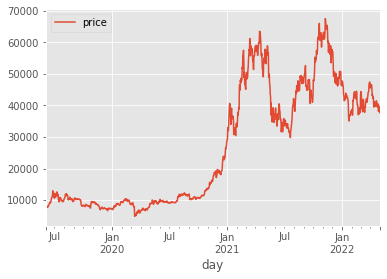

In [55]:
df.plot()
plt.show()

# ARIMA(Autoregressvie integrated MovingAverage)

AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황

MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

차분은 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산하는 것.

(아래 그림처럼 비정상성에서 정상성으로)

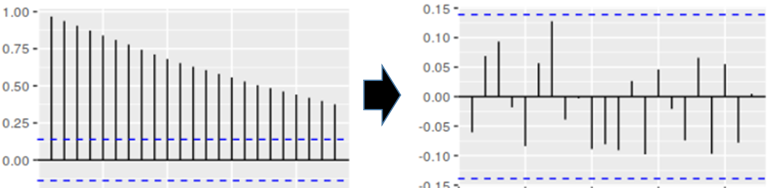

In [24]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(Ar=2,차분=1,MA=2) 파라미터로 ARIMA 모델을 학습한다. 
model=ARIMA(df.price.values,order=(2,1,2))


In [57]:
model_fit=model.fit(trend='c',full_output=True,disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1064
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9096.857
Method:                       css-mle   S.D. of innovations           1249.648
Date:                Fri, 03 Jun 2022   AIC                          18205.715
Time:                        16:39:27   BIC                          18235.533
Sample:                             1   HQIC                         18217.014
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5501     37.540      0.761      0.447     -45.026     102.127
ar.L1.D.y      0.8191      0.034     24.402      0.000       0.753       0.885
ar.L2.D.y     -0.9467      0.040    -23.831      0.0

In [62]:
#ARIMA  모델 학습에 의한 예측 결과를 보자
forcast_data=model_fit.forecast(steps=5)#학습데이터셋으로부터 5일 뒤를 예측

#test 데이터셋 불러오기
test=pd.read_csv('/content/market-price (3).csv')
test.head()

,Timestamp,market-price
0,2022-05-04 0:00,37727.19
1,2022-05-05 0:00,39674.89
2,2022-05-06 0:00,36549.90
3,2022-05-07 0:00,36013.03
4,2022-05-08 0:00,35471.42


In [63]:
test=test.rename(columns={'Timestamp':'ds','market-price':'y'})
#df=df.rename(columns={'Timestamp':'day','market-price':'price'})

In [64]:
test.head()

,ds,y
0,2022-05-04 0:00,37727.19
1,2022-05-05 0:00,39674.89
2,2022-05-06 0:00,36549.90
3,2022-05-07 0:00,36013.03
4,2022-05-08 0:00,35471.42


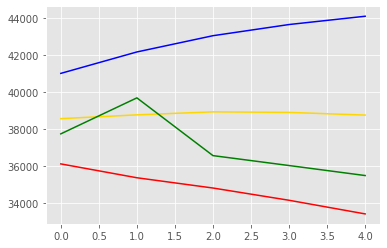

In [65]:
pred_y=forcast_data[0].tolist()#마지막 5일의 예측데이터
test_y=test.y.values#실제 30일 가격 데이터

pred_y_lower=[]#마지막 5일의 예측 데이터의 최솟값
pred_y_upper=[]#마지막 5일의 예측 데이터의 최댓값

for lower_upper in forcast_data[2]:
  lower=lower_upper[0]
  upper=lower_upper[1]
  pred_y_lower.append(lower)
  pred_y_upper.append(upper)

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [69]:
from fbprophet import Prophet

In [71]:
df=pd.read_csv('/content/market-price (4).csv')

In [72]:
df=df.rename(columns={'Timestamp':'ds','market-price':'y'})

In [73]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'

prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(df)

In [74]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1065,2022-05-04,39353.801889,37076.687473,41595.685553
1066,2022-05-05,39223.504492,36974.281230,41455.196154
1067,2022-05-06,38708.244505,36332.056756,40925.912358
1068,2022-05-07,38419.270418,36205.694735,40745.304078
1069,2022-05-08,38046.886960,35711.100584,40464.027687


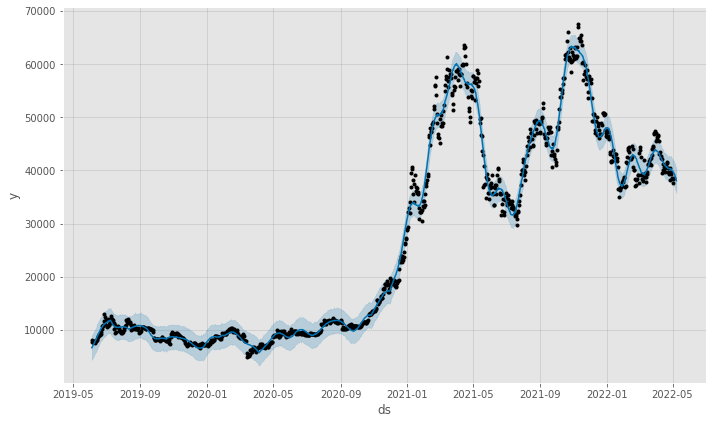

In [75]:
fig1 = prophet.plot(forecast_data)

아까 설정했던 계절별 추세를 따로 살펴보는 부분이 있는데, 이는 월,요일,시간별 평균 추세가 어느정도인지 파악 후, 예측에서 시간대별로 가중치를 두기위함입니다.

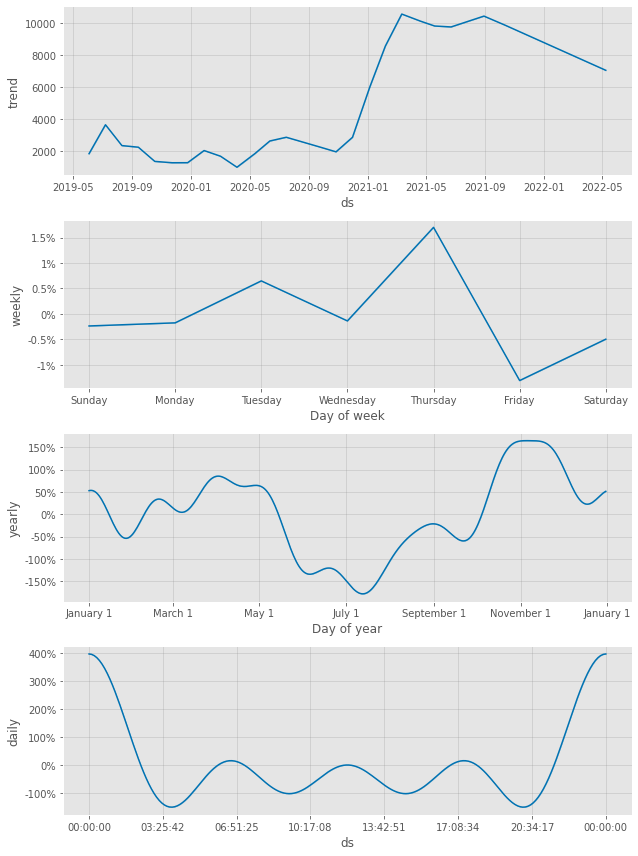

In [76]:
fig2 = prophet.plot_components(forecast_data)

주별로 봤을 땐 수요일에서 토요일까지 주로 상승하는 요일로 나옵니다.
달로 봤을 땐 상반기에 추세가 오르다가 하반기에 감소하네요.
하루로 봤을 땐 한국 저녁 9시 이후 상승하는데, 이는 코인 시장의 메인인 북미 기준으로 이때가 하루 일과의 시작인 아침이라고 판단됩니다.

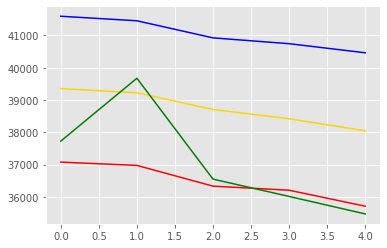

In [77]:


pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터입니다. 
test_y = test.y.values # 실제 5일 가격 데이터입니다.
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값입니다.

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.